In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from config import weather_api_key
from citipy import citipy
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
#zip them together
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

613

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
#enumerate will get the index of the city for logging purposes 
#& the city for creating the URL

for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
        #(" ","+") means that it will remove spaces from city name & replace with +

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except KeyError:
        print("City not found. Skipping...")
        pass
            #Pass should be avoided
            #This means stop here and start back at the top, don't print the next line


# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ust-kamchatsk
City not found. Skipping...
Processing Record 2 of Set 1 | provideniya
Processing Record 3 of Set 1 | lumeje
Processing Record 4 of Set 1 | fairbanks
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | cherskiy
Processing Record 8 of Set 1 | illapel
Processing Record 9 of Set 1 | leh
Processing Record 10 of Set 1 | sao joao da barra
Processing Record 11 of Set 1 | kruisfontein
Processing Record 12 of Set 1 | hasaki
Processing Record 13 of Set 1 | new norfolk
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | kapaa
Processing Record 16 of Set 1 | pryozerne
Processing Record 17 of Set 1 | caravelas
Processing Record 18 of Set 1 | belaya gora
Processing Record 19 of Set 1 | tasiilaq
Processing Record 20 of Set 1 | esperance
Processing Record 21 of Set 1 | port alfred
Processing Record 22 of Set 1 | lekoni
Pr

Processing Record 40 of Set 4 | bowen
Processing Record 41 of Set 4 | rock springs
Processing Record 42 of Set 4 | limbang
Processing Record 43 of Set 4 | marzuq
Processing Record 44 of Set 4 | chuy
Processing Record 45 of Set 4 | lerwick
Processing Record 46 of Set 4 | lavrentiya
Processing Record 47 of Set 4 | mahebourg
Processing Record 48 of Set 4 | bereda
Processing Record 49 of Set 4 | disna
Processing Record 50 of Set 4 | hihifo
City not found. Skipping...
Processing Record 1 of Set 5 | taolanaro
City not found. Skipping...
Processing Record 2 of Set 5 | elat
Processing Record 3 of Set 5 | lac du bonnet
Processing Record 4 of Set 5 | komsomolskiy
Processing Record 5 of Set 5 | shangrao
Processing Record 6 of Set 5 | longyearbyen
Processing Record 7 of Set 5 | bhanvad
Processing Record 8 of Set 5 | amderma
City not found. Skipping...
Processing Record 9 of Set 5 | east london
Processing Record 10 of Set 5 | husavik
Processing Record 11 of Set 5 | menongue
Processing Record 12 of 

Processing Record 26 of Set 8 | te anau
Processing Record 27 of Set 8 | ust-kulom
Processing Record 28 of Set 8 | inderborskiy
City not found. Skipping...
Processing Record 29 of Set 8 | ancud
Processing Record 30 of Set 8 | luanda
Processing Record 31 of Set 8 | diffa
Processing Record 32 of Set 8 | jasper
Processing Record 33 of Set 8 | kaoma
Processing Record 34 of Set 8 | lorengau
Processing Record 35 of Set 8 | lompoc
Processing Record 36 of Set 8 | deputatskiy
Processing Record 37 of Set 8 | nola
Processing Record 38 of Set 8 | kununurra
Processing Record 39 of Set 8 | samusu
City not found. Skipping...
Processing Record 40 of Set 8 | methoni
Processing Record 41 of Set 8 | mbacke
City not found. Skipping...
Processing Record 42 of Set 8 | rocha
Processing Record 43 of Set 8 | pringsewu
Processing Record 44 of Set 8 | newtownards
Processing Record 45 of Set 8 | rabo de peixe
Processing Record 46 of Set 8 | oranjemund
Processing Record 47 of Set 8 | oriximina
Processing Record 48 

Processing Record 13 of Set 12 | troitsko-pechorsk
Processing Record 14 of Set 12 | kamaishi
Processing Record 15 of Set 12 | danville
Processing Record 16 of Set 12 | mahenge
Processing Record 17 of Set 12 | mattru
Processing Record 18 of Set 12 | alakurtti
Processing Record 19 of Set 12 | baymak
Processing Record 20 of Set 12 | general pico
Processing Record 21 of Set 12 | taganak
Processing Record 22 of Set 12 | tahoua
Processing Record 23 of Set 12 | esil
Processing Record 24 of Set 12 | ndjole
Processing Record 25 of Set 12 | inta
Processing Record 26 of Set 12 | abbeville
Processing Record 27 of Set 12 | coro
Processing Record 28 of Set 12 | kirksville
Processing Record 29 of Set 12 | churapcha
Processing Record 30 of Set 12 | sumbawa
City not found. Skipping...
Processing Record 31 of Set 12 | iqaluit
Processing Record 32 of Set 12 | cabedelo
Processing Record 33 of Set 12 | rock sound
Processing Record 34 of Set 12 | terrak
Processing Record 35 of Set 12 | dolbeau
City not foun

In [7]:
#Count the number of successfully gathered cities
#city_data.count()

TypeError: count() takes exactly one argument (0 given)

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Provideniya,64.3833,-173.3000,1.40,71,0,17.90,RU,2021-03-04 05:25:26
1,Lumeje,-11.5500,20.7833,64.67,87,80,2.51,AO,2021-03-04 05:26:39
2,Fairbanks,64.8378,-147.7164,-0.99,77,90,2.46,US,2021-03-04 05:23:55
3,Hermanus,-34.4187,19.2345,64.99,95,84,8.93,ZA,2021-03-04 05:26:42
4,Rikitea,-23.1203,-134.9692,80.58,80,64,7.58,PF,2021-03-04 05:26:43
5,Cherskiy,68.7500,161.3000,0.36,97,100,5.50,RU,2021-03-04 05:26:43
6,Illapel,-31.6308,-71.1653,64.96,71,0,2.39,CL,2021-03-04 05:26:44
7,Leh,34.1667,77.5833,17.85,79,73,3.40,IN,2021-03-04 05:26:45
8,Sao Joao Da Barra,-21.6403,-41.0511,75.76,90,100,14.29,BR,2021-03-04 05:26:45
9,Kruisfontein,-34.0033,24.7314,63.00,93,0,2.10,ZA,2021-03-04 05:26:46


In [12]:
#Reorder columns: City, Country, Date, 
#Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed
new_column_order = ["City", "Country", "Date", "Lat", "Lng", 
                    "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

#Assign new column order to DF
city_data_df = city_data_df[new_column_order]
city_data_df.count()
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Provideniya,RU,2021-03-04 05:25:26,64.3833,-173.3000,1.40,71,0,17.90
1,Lumeje,AO,2021-03-04 05:26:39,-11.5500,20.7833,64.67,87,80,2.51
2,Fairbanks,US,2021-03-04 05:23:55,64.8378,-147.7164,-0.99,77,90,2.46
3,Hermanus,ZA,2021-03-04 05:26:42,-34.4187,19.2345,64.99,95,84,8.93
4,Rikitea,PF,2021-03-04 05:26:43,-23.1203,-134.9692,80.58,80,64,7.58
...,...,...,...,...,...,...,...,...,...
553,San Patricio,US,2021-03-04 05:35:58,28.0170,-97.5169,55.99,87,40,8.05
554,Preobrazheniye,RU,2021-03-04 05:35:59,42.9019,133.9064,38.91,84,51,12.64
555,Thinadhoo,MV,2021-03-04 05:36:00,0.5333,72.9333,82.83,63,46,9.53
556,Nhulunbuy,AU,2021-03-04 05:36:02,-12.2333,136.7667,84.20,65,75,16.11


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [18]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime('%Y-%m-%d %H:%M:%S')
today

'2021-03-03 21:47:07'

[]

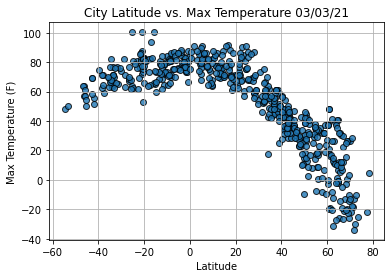

In [21]:
#Build the scatter plot for latitude vs max temperature
plt.scatter(lats, max_temps, edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

plt.plot()

[]

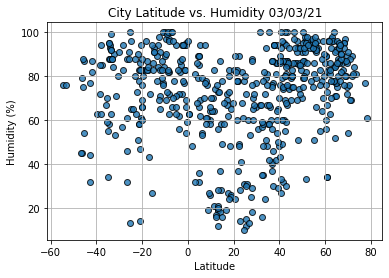

In [22]:
#Build the scatter plot for latitude vs humidity
plt.scatter(lats, humidity, edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

plt.plot()

[]

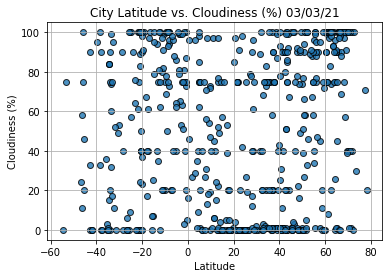

In [23]:
#Build the scatter plot for latitude vs cloudiness
plt.scatter(lats, cloudiness, edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

plt.plot()

In [ ]:
#Build the scatter plot for latitude vs wind speed
plt.scatter(lats, wind_speed, edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Windspeed (MPH) "+ time.strftime("%x"))
plt.ylabel("Windspeed (MPH)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

plt.plot()